In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#generate the sample
def gen_data():
    mu = 0
    sigma =1
    N=10000
    x = np.random.normal(loc=mu, scale=sigma, size=N)
    return x,N,mu,sigma

In [3]:
#visualize the guassian process
def gen_llr():
    process = []
    rescale = []
    x,N,mu,sigma = gen_data()
    n0 = 10
    skip = 200

    for n in range(n0,N,skip):
        xn = x[1:n+1]
        process.append(xn.sum())
        rescale.append(xn.var())
        
    return process, rescale, n0, N, skip,mu,sigma


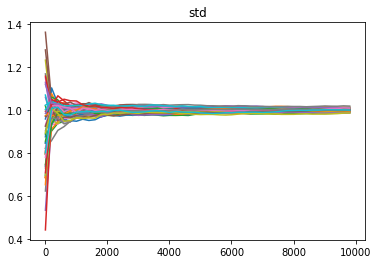

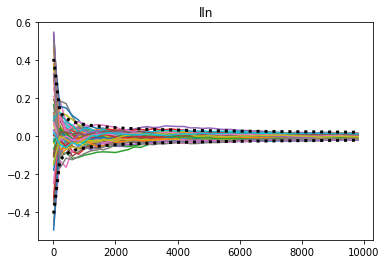

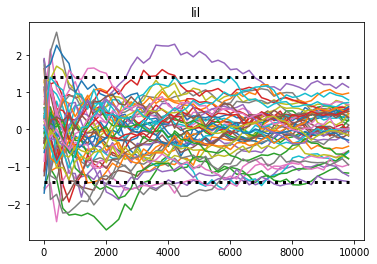

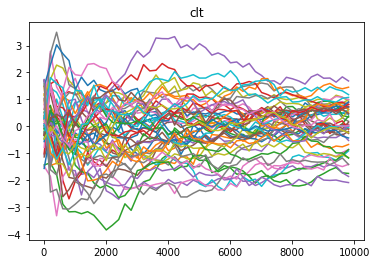

In [12]:
for i in range(50):
    process, rescale, n0, N, skip,mu,sigma = gen_llr()
    process = np.array(process)
    scale = np.arange(n0,N,skip)
    std_process = np.sqrt(np.array(rescale))
    
    plt.figure(4)
    plt.title("std")
    plt.plot(scale, std_process)
    
    #scale by 1/n
    plt.figure(1)
    plt.title("lln")
    plt.plot(scale, process/scale-mu)

    #scale by root
    plt.figure(2)
    plt.title("lil")
    plt.plot(scale,  (process/scale-mu)/ ( np.sqrt(np.log(np.log(scale))/scale) ) )
    #plt.plot(scale,  (process)/ ( np.sqrt(np.log(np.log(scale))*scale) ) )
    
    #scale by root n
    plt.figure(3)
    plt.title("clt")
    plt.plot(scale, np.sqrt(scale)*(process/scale - mu) )



plt.figure(1)
plt.plot(scale,np.sqrt(2*np.log(np.log(scale))/scale),  color='black', linewidth=3, linestyle=":" )
plt.plot(scale,-1*np.sqrt(2*np.log(np.log(scale))/scale),  color='black', linewidth=3, linestyle=":" )
   
plt.figure(2)
plt.plot(scale,np.sqrt(2)*np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":" )
plt.plot(scale,-np.sqrt(2)*np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":" )

plt.show()